In [76]:
import os
import numpy as np
from Dades_Gus.dataLoader import load_fullCohort_fMRI, checkClassifications
import Observables.BOLDFilters as BOLDFilters
# NARROW LOW BANDPASS
BOLDFilters.flp = .02      # lowpass frequency of filter
BOLDFilters.fhi = 0.1      # highpass
BOLDFilters.TR = 3.

#from Observables.FC import from_fMRI, init, accumulate, postprocess
import Observables.FC as FC
from Dades_Gus.setup_forJoan import *

In [52]:
# Configuració de directoris i subjetes
base_folder = "/Users/joancarrerasdiaz/Desktop/CARPETES/UdG/TFG/Dades_Gus"
classification_file = "/subjects.csv"

In [53]:
# Carregar informació de clasificació de subjectes
subjects = [subject for subject in os.listdir(os.path.join(base_folder, "connectomes")) if os.path.isdir(os.path.join(base_folder, "connectomes", subject))]
classification = checkClassifications(subjects, fileName=classification_file)

0: Subject 003_S_6014 classified as HC
1: Subject 011_S_4547 classified as AD
2: Subject 036_S_4430 classified as AD
3: Subject 002_S_1261 classified as MCI
4: Subject 007_S_4488 classified as HC
5: Subject 003_S_1122 classified as MCI
6: Subject 036_S_4715 classified as AD
7: Subject 023_S_1190 classified as AD
8: Subject 168_S_6142 classified as AD
9: Subject 012_S_6073 classified as MCI
10: Subject 002_S_0413 classified as HC
11: Subject 002_S_4229 classified as MCI
12: Subject 007_S_4387 classified as HC
13: Subject 023_S_4115 classified as MCI
14: Subject 002_S_1280 classified as HC
15: Subject 002_S_4799 classified as HC
16: Subject 002_S_5230 classified as SMC
17: Subject 114_S_6039 classified as AD
18: Subject 002_S_6103 classified as HC
19: Subject 002_S_4654 classified as MCI
20: Subject 002_S_5178 classified as HC
21: Subject 011_S_4893 classified as AD
22: Subject 114_S_0416 classified as AD
23: Subject 007_S_4272 classified as MCI
24: Subject 007_S_4620 classified as HC
25

In [54]:
# Carregar senyals fMRI per tots els subjectes en la cohort
all_fMRI = load_fullCohort_fMRI(classification, base_folder)

fMRI HC: 002_S_0413
fMRI HC: 002_S_1280
fMRI HC: 002_S_4213
fMRI HC: 002_S_4799
fMRI HC: 002_S_5178
fMRI HC: 002_S_6009
fMRI HC: 002_S_6030
fMRI HC: 002_S_6053
fMRI HC: 002_S_6103
fMRI HC: 003_S_4288
fMRI HC: 003_S_4644
fMRI HC: 003_S_6067
fMRI HC: 007_S_4387
fMRI HC: 007_S_4488
fMRI HC: 007_S_4620
fMRI HC: 002_S_6007
fMRI HC: 003_S_6014


In [67]:
# Acumular les matrius de connectividad funcional per tots els subjectes
for i, subject in enumerate(HCSubjects):
    fMRI_signal = all_fMRI[subject]
    FC_subject = FC.from_fMRI(fMRI_signal)

In [68]:
print("Estadístiques de la matriu de connectivitatfuncional:")
dataLoader.analyzeMatrix("FC", FC_subject)

Estadístiques de la matriu de connectivitatfuncional:
FC => Shape:(379, 379), Max:1.0, Min:-0.8072755434913029, Avg:0.15313953110352488, Std:0.28674360274830396  => impact=Avg*#:58.03988228823593  => maxNodeInputs:123.97244782480924  => avgNodeInputs:58.039882288235944


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

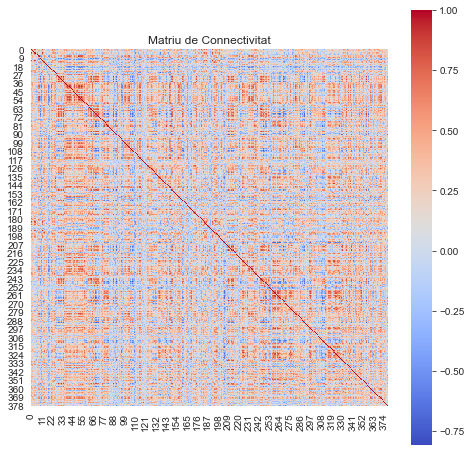

In [70]:
plt.figure(figsize=(8, 8))
sns.heatmap(FC_subject, cmap="coolwarm", square=True)
plt.title("Matriu de Connectivitat")
plt.show()

In [63]:
# Calcular la mitjana de les matriuss de connectivitat funcional
average_functional_connectivity_matrix = FC_subject

In [71]:
# Imprimir la matriu de connectivitat funcional promig
print("Average Functional Connectivity Matrix:")
print(average_functional_connectivity_matrix)

Average Functional Connectivity Matrix:
[ 0.20910191  0.23836404  0.11995272  0.16629139  0.12378165  0.02289434
  0.00651006  0.27632934  0.25756668  0.293493   -0.05555699 -0.16438097
  0.15556254  0.19699739  0.28239227  0.02588678  0.17343353  0.13731341
 -0.16381179 -0.14673745  0.10189752 -0.13406021  0.2717066   0.14473903
  0.25443697 -0.0465941   0.03921132  0.21743024  0.02555691  0.16849495
  0.09289591  0.1807302   0.20215804  0.11378859  0.08783398  0.28773735
  0.2120825   0.32076932  0.25204878  0.2202171   0.29288153  0.25803824
  0.21226742  0.13371251  0.22352523  0.09408035  0.3056599   0.00700467
  0.21014119  0.21777199  0.26501878  0.23765145  0.27445868  0.25363231
  0.32248499  0.18112625  0.26040751  0.10900542  0.18625462  0.09077802
  0.29508702  0.11542271 -0.12568058  0.20987073  0.17776569  0.32710408
  0.13083883  0.23228597 -0.00280897  0.04248821  0.24489845  0.06459303
  0.18145091  0.12753204  0.23060984  0.24021084  0.04772093  0.21520953
  0.1863862

In [72]:
print("Estadístiques de la matriu de connectivitatfuncional promig:")
dataLoader.analyzeMatrix("FC", average_functional_connectivity_matrix)

Estadístiques de la matriu de connectivitatfuncional promig:
FC => Shape:(379,), Max:0.3271040839704729, Min:-0.21649298364984207, Avg:0.1531395311035249, Std:0.10922800697843679  => impact=Avg*#:58.03988228823594  => maxNodeInputs:58.039882288235944  => avgNodeInputs:58.039882288235944


In [74]:
plt.figure(figsize=(8, 8))
sns.heatmap(average_functional_connectivity_matrix, cmap="coolwarm", square=True)
plt.title("Matriu de Connectivitat")
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (379, 1) and (379,))

<Figure size 576x576 with 0 Axes>